# Code to import file :

In [1]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


# Importing libraries :

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv("titanic.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Removing unwanted column :

In [7]:
df.drop(["Name","Ticket","Cabin"], axis=1,inplace = True)

# Missing Values :

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [9]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
df["Embarked"].fillna("S",inplace=True)

In [11]:
df["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [12]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# Data Type :

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


# Visualization of columns with surivived (Target) :

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


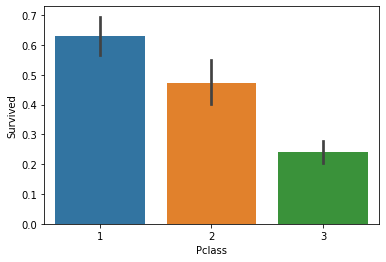

In [15]:
sns.barplot(x="Pclass", y="Survived", data=df)
#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", df["Survived"][df["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 2 who survived:", df["Survived"][df["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 3 who survived:", df["Survived"][df["Pclass"] == 3].value_counts(normalize = True)[1]*100)

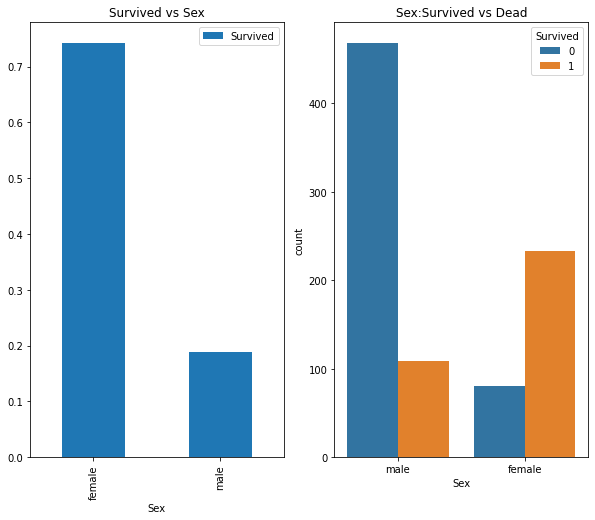

In [17]:
f,ax=plt.subplots(1,2,figsize=(10,8))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

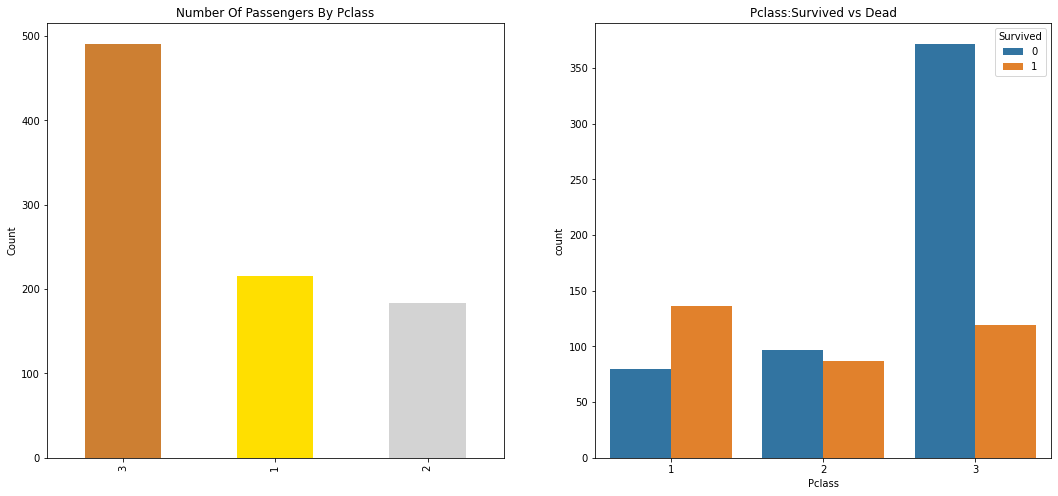

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

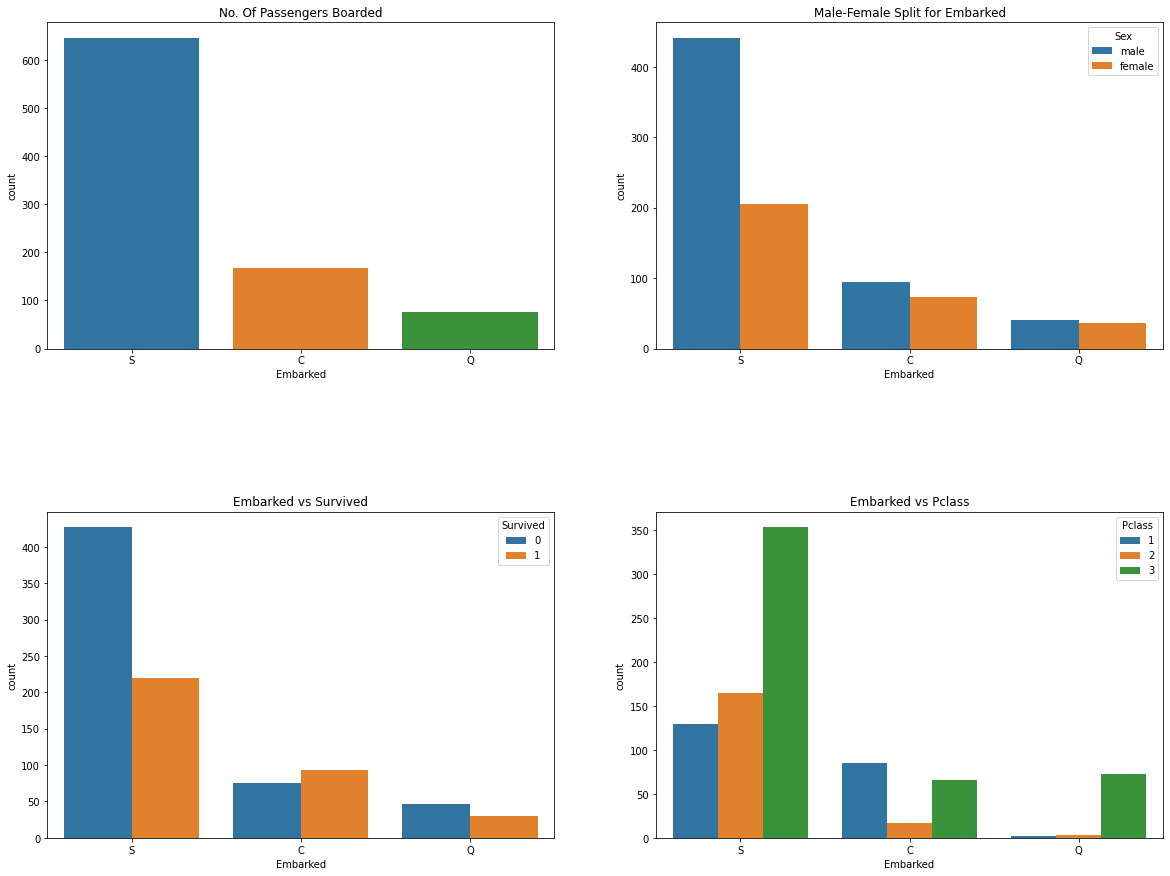

In [19]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=df,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=df,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=df,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

# Numaric Data :

In [20]:
df_num = df.select_dtypes(["float64","int64"])

In [21]:
df_num

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,0,3,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


# Categorical Data :

In [22]:
df_cat = df.select_dtypes(object)

In [23]:
df_cat

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


# Fixing categorical data :

In [24]:
le = LabelEncoder()

In [26]:
for col in df_cat:
  le = LabelEncoder()
  df_cat[col] = le.fit_transform(df_cat[col])

In [27]:
df_cat

,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2
...,...,...
886,1,2
887,0,2
888,0,2
889,1,0


# Final data for model :

In [28]:
df = pd.concat([df_cat,df_num],axis=1)

In [29]:
df

,Sex,Embarked,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,2,1,0,3,22.000000,1,0,7.2500
1,0,0,2,1,1,38.000000,1,0,71.2833
2,0,2,3,1,3,26.000000,0,0,7.9250
3,0,2,4,1,1,35.000000,1,0,53.1000
4,1,2,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
886,1,2,887,0,2,27.000000,0,0,13.0000
887,0,2,888,1,1,19.000000,0,0,30.0000
888,0,2,889,0,3,29.699118,1,2,23.4500
889,1,0,890,1,1,26.000000,0,0,30.0000


In [30]:
df.describe(include="all")

,Sex,Embarked,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.647587,1.536476,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.477990,0.791503,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,1.000000,2.000000,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,2.000000,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,2.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Correlation using heatmap :

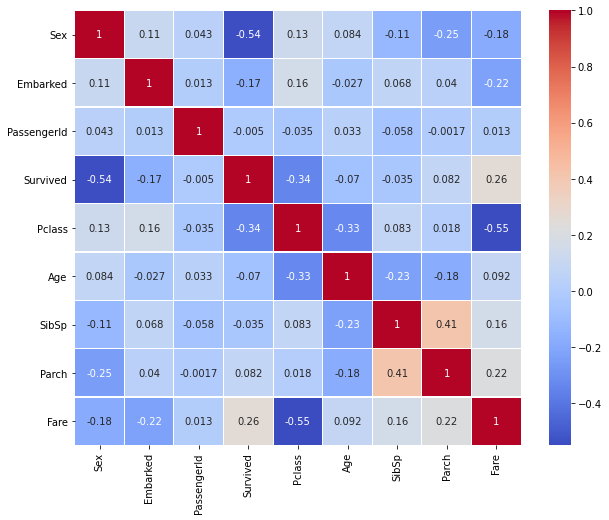

In [31]:
df.corr()
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Seprating X and y :

In [32]:
y = df["Survived"]
X = df.drop("Survived",axis=1)

In [33]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [34]:
X

,Sex,Embarked,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,2,1,3,22.000000,1,0,7.2500
1,0,0,2,1,38.000000,1,0,71.2833
2,0,2,3,3,26.000000,0,0,7.9250
3,0,2,4,1,35.000000,1,0,53.1000
4,1,2,5,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,1,2,887,2,27.000000,0,0,13.0000
887,0,2,888,1,19.000000,0,0,30.0000
888,0,2,889,3,29.699118,1,2,23.4500
889,1,0,890,1,26.000000,0,0,30.0000


In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [36]:
def train_model(model):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print(classification_report(y_test,y_pred))
  return model

# Logistic Regression :

In [37]:
log = LogisticRegression()

In [38]:
train_model(log)

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       153
           1       0.77      0.62      0.69       115

    accuracy                           0.76       268
   macro avg       0.76      0.74      0.74       268
weighted avg       0.76      0.76      0.75       268



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Decision Tree :

In [39]:
dt1 = DecisionTreeClassifier()

In [40]:
dt1 = train_model(dt1)

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       153
           1       0.74      0.66      0.70       115

    accuracy                           0.75       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268



In [41]:
dt1.feature_importances_

array([0.32100818, 0.03894385, 0.20193345, 0.10560546, 0.15586209,
       0.04939164, 0.01270037, 0.11455496])

In [42]:
print(df.columns.tolist())

['Sex', 'Embarked', 'PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [43]:
from sklearn import tree

# PLotting DecsionTree :

[Text(114.5390625, 211.4, 'X[0] <= 0.5\ngini = 0.463\nsamples = 623\nvalue = [396, 227]'),
 Text(54.225, 199.32, 'X[3] <= 2.5\ngini = 0.387\nsamples = 217\nvalue = [57, 160]'),
 Text(28.8, 187.24, 'X[4] <= 2.5\ngini = 0.097\nsamples = 117\nvalue = [6, 111]'),
 Text(21.6, 175.16, 'X[7] <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(18.0, 163.07999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(25.2, 163.07999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(36.0, 175.16, 'X[7] <= 28.856\ngini = 0.083\nsamples = 115\nvalue = [5, 110]'),
 Text(32.4, 163.07999999999998, 'X[7] <= 28.231\ngini = 0.206\nsamples = 43\nvalue = [5, 38]'),
 Text(28.8, 151.0, 'X[2] <= 828.5\ngini = 0.172\nsamples = 42\nvalue = [4, 38]'),
 Text(21.6, 138.92000000000002, 'X[2] <= 373.0\ngini = 0.142\nsamples = 39\nvalue = [3, 36]'),
 Text(18.0, 126.84, 'X[2] <= 352.5\ngini = 0.245\nsamples = 21\nvalue = [3, 18]'),
 Text(14.4, 114.75999999999999, 'X[4] <= 27.5\ngini = 0.18\nsample

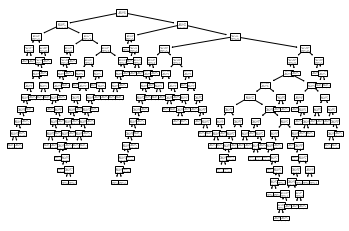

In [44]:
tree.plot_tree(dt1)

# Depth in tree :

In [45]:
dt1.get_depth()

17

# Using Custom Depth :

In [46]:
dt2 = DecisionTreeClassifier(max_depth=10)

In [47]:
train_model(dt2)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       153
           1       0.79      0.61      0.69       115

    accuracy                           0.76       268
   macro avg       0.77      0.74      0.75       268
weighted avg       0.76      0.76      0.76       268



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Using random sample leaf :

In [48]:
dt3 = DecisionTreeClassifier(min_samples_leaf=16)

In [49]:
train_model(dt3)

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       153
           1       0.71      0.65      0.68       115

    accuracy                           0.74       268
   macro avg       0.73      0.72      0.73       268
weighted avg       0.73      0.74      0.73       268



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=16, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Entropy Criterion :

In [50]:
dt4 = DecisionTreeClassifier(criterion='entropy')

In [51]:
train_model(dt4)

              precision    recall  f1-score   support

           0       0.74      0.81      0.78       153
           1       0.71      0.63      0.67       115

    accuracy                           0.73       268
   macro avg       0.73      0.72      0.72       268
weighted avg       0.73      0.73      0.73       268



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')